In [75]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, utils
from keras.preprocessing.image import ImageDataGenerator, DirectoryIterator



In [49]:
# Définir la taille des images en entrée
image_size = (64, 64)
batch_size = 64



In [50]:
# Créer un générateur d'images sans augmentation pour l'entraînement
train_datagen = ImageDataGenerator(rescale=1./255)

# Créer le générateur de données d'entraînement
train_ds = DirectoryIterator(
    "/content/drive/MyDrive/Simpsons/simpsons_train",
    train_datagen,
    class_mode='categorical',
    seed=1337,
    target_size=image_size,
    batch_size=batch_size,
    subset='training'
)



Found 20939 images belonging to 42 classes.


In [51]:
# Définir le modèle CNN
model = models.Sequential()
model.add(layers.InputLayer(input_shape=image_size + (3,)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(train_ds.class_indices), activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
# Entraîner le modèle
model.fit(train_ds, epochs=5, steps_per_epoch=train_ds.samples // batch_size)

Epoch 1/5
327/327 [==============================] - 327s 997ms/step - loss: 1.9744 - accuracy: 0.4624
Epoch 2/5
327/327 [==============================] - 321s 979ms/step - loss: 1.2596 - accuracy: 0.6492
Epoch 3/5
327/327 [==============================] - 324s 990ms/step - loss: 0.8808 - accuracy: 0.7480
Epoch 4/5
327/327 [==============================] - 326s 996ms/step - loss: 0.6470 - accuracy: 0.8160
Epoch 5/5
327/327 [==============================] - 323s 989ms/step - loss: 0.4646 - accuracy: 0.8674


In [99]:
model.save("/content/drive/MyDrive/Simpsons/modele.h5")
model.save("/content/drive/MyDrive/Simpsons/modele", save_format='tf')


In [100]:
loaded_model = models.load_model("/content/drive/MyDrive/Simpsons/modele.h5")


In [56]:
class_names = train_ds.class_indices
class_names = {v: k for k, v in class_names.items()}
print(class_names)


{0: 'abraham_grampa_simpson', 1: 'agnes_skinner', 2: 'apu_nahasapeemapetilon', 3: 'barney_gumble', 4: 'bart_simpson', 5: 'carl_carlson', 6: 'charles_montgomery_burns', 7: 'chief_wiggum', 8: 'cletus_spuckler', 9: 'comic_book_guy', 10: 'disco_stu', 11: 'edna_krabappel', 12: 'fat_tony', 13: 'gil', 14: 'groundskeeper_willie', 15: 'homer_simpson', 16: 'kent_brockman', 17: 'krusty_the_clown', 18: 'lenny_leonard', 19: 'lionel_hutz', 20: 'lisa_simpson', 21: 'maggie_simpson', 22: 'marge_simpson', 23: 'martin_prince', 24: 'mayor_quimby', 25: 'milhouse_van_houten', 26: 'miss_hoover', 27: 'moe_szyslak', 28: 'ned_flanders', 29: 'nelson_muntz', 30: 'otto_mann', 31: 'patty_bouvier', 32: 'principal_skinner', 33: 'professor_john_frink', 34: 'rainier_wolfcastle', 35: 'ralph_wiggum', 36: 'selma_bouvier', 37: 'sideshow_bob', 38: 'sideshow_mel', 39: 'snake_jailbird', 40: 'troy_mcclure', 41: 'waylon_smithers'}


1/1 [==============================] - 0s 32ms/step


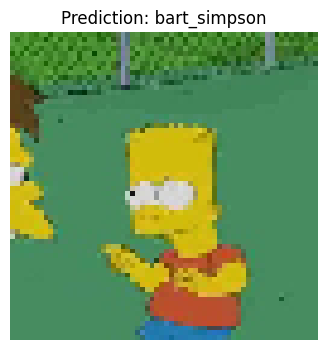

1/1 [==============================] - 0s 28ms/step


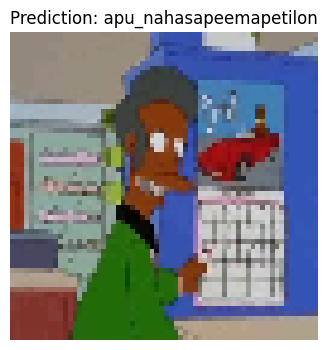

1/1 [==============================] - 0s 30ms/step


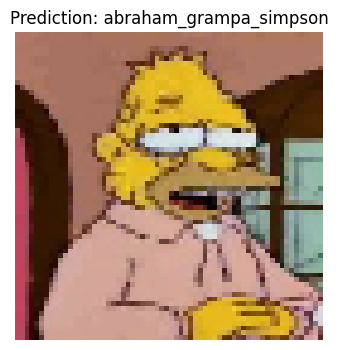

1/1 [==============================] - 0s 52ms/step


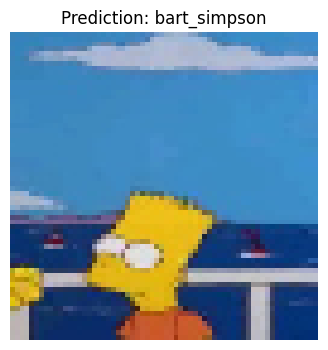

1/1 [==============================] - 0s 49ms/step


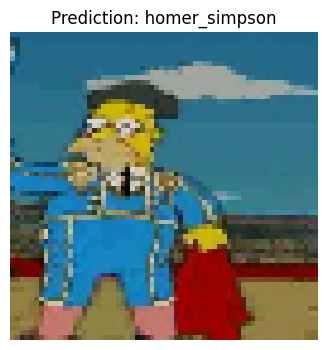

1/1 [==============================] - 0s 38ms/step


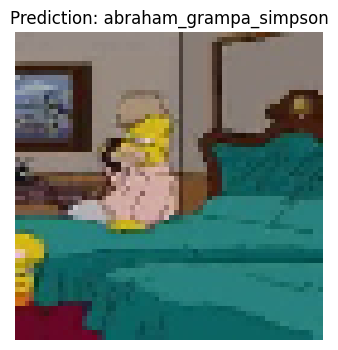

1/1 [==============================] - 0s 33ms/step


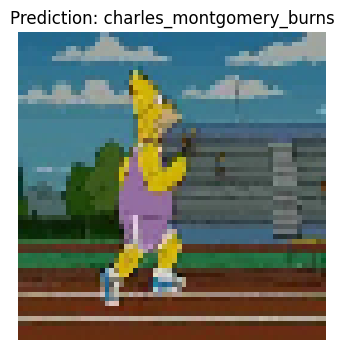

1/1 [==============================] - 0s 29ms/step


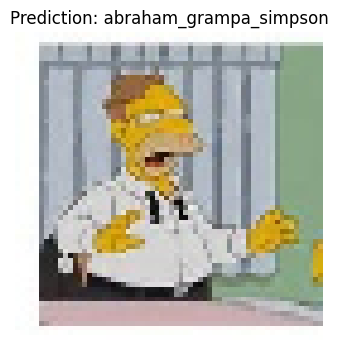

1/1 [==============================] - 0s 28ms/step


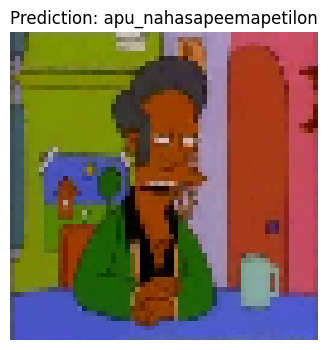

1/1 [==============================] - 0s 30ms/step


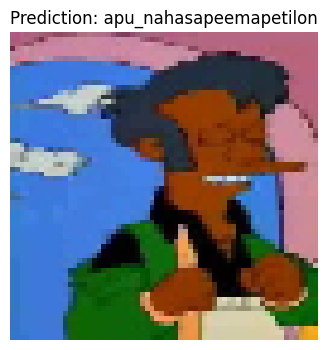

In [101]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Chemin vers le dossier de test
test_folder_path = "/content/drive/MyDrive/Simpsons/kaggle_simpson_testset"

# Récupérer la liste des noms de fichiers d'images dans le dossier de test
image_files = [f for f in os.listdir(test_folder_path) if f.endswith('.jpg')]

# Charger et afficher les 20 premières images avec leurs prédictions
for i in range(10):
    # Construire le chemin complet de l'image
    image_file = image_files[i+20]
    image_path = os.path.join(test_folder_path, image_file)

    # Charger l'image et la prétraiter si nécessaire (ici, nous utilisons seulement le redimensionnement)
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalisation

    # Faire la prédiction
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]

    # Afficher l'image avec la prédiction
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}")
    plt.axis("off")
    plt.show()
